In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os


bs = pd.read_csv("day.csv")
bs

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
#bs.shape

(730, 16)

In [8]:
#bs.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [80]:
#Curate Column Names
#bs.head(10)
bs.rename( columns = { 'instant':'record_index',
                       'dteday' : 'datetime',
                       'yr'     : 'year',
                       'mnth'   : 'month',
                       'weathersit':'weather_status',
                       'atemp'  : 'feeling_temp',
                       'hum'    : 'humidity',
                       'cnt' : 'shring_count' },
           inplace = True);
                       
bs.head(5)

,record_index,datetime,season,year,month,holiday,weekday,workingday,weather_status,temp,feeling_temp,humidity,windspeed,casual,registered,shring_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [81]:
#null value treatement
bs['datetime'] = pd.to_datetime(bs.datetime)
bs['season'] = bs.season.astype('category')
bs['year'] = bs.year.astype('category')
bs['month'] = bs.month.astype('category')
bs['holiday'] = bs.holiday.astype('category')
bs['weekday'] = bs.weekday.astype('category')
bs['workingday'] = bs.workingday.astype('category')
bs['weather_status'] = bs.weather_status.astype('category')
bs.dtypes

record_index               int64
datetime          datetime64[ns]
season                  category
year                    category
month                   category
holiday                 category
weekday                 category
workingday              category
weather_status          category
temp                     float64
feeling_temp             float64
humidity                 float64
windspeed                float64
casual                     int64
registered                 int64
shring_count               int64
dtype: object

In [82]:
#Understand the data now
bs.describe()

,record_index,temp,feeling_temp,humidity,windspeed,casual,registered,shring_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [83]:
# Curate Missing Values now
bs.isnull().sum()
# Look at the output below. There are no columns with "Null" values. 
# The data does not has NULL value columns

record_index      0
datetime          0
season            0
year              0
month             0
holiday           0
weekday           0
workingday        0
weather_status    0
temp              0
feeling_temp      0
humidity          0
windspeed         0
casual            0
registered        0
shring_count      0
dtype: int64

In [84]:
#bs

In [40]:
"""
Press ===> Shift + tab ==> you will get all the options
"""
sns.barplot()

In [41]:
"""
Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,  //categorical data
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ci='deprecated',
    ax=None,
    **kwargs,
)
"""
bs.dtypes

record_index               int64
datetime          datetime64[ns]
season                  category
year                    category
month                   category
holiday                 category
weekday                 category
workingday              category
weather_status          category
temp                     float64
feeling_temp             float64
humidity                 float64
windspeed                float64
casual                     int64
registered                 int64
count                      int64
dtype: object

<Axes: xlabel='month', ylabel='shring_count'>

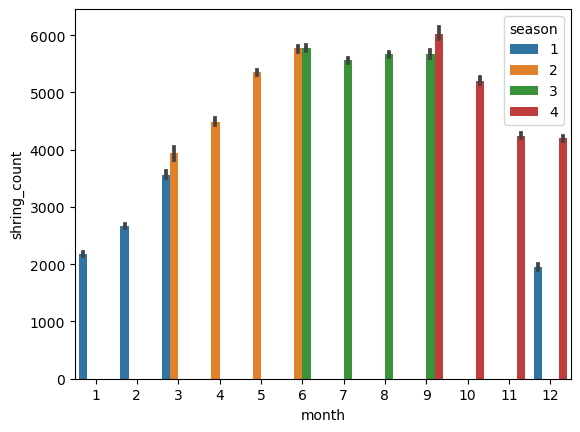

In [86]:
# count of total rental bikes including both casual and registered on monthly basis
sns.barplot(x='month', y='shring_count', data= bs,hue='season', ci=20)
# season wise bike sharing count on monthly basis. 
# In Jan 2000 bike sharing count is there and Feb ~3K, March ~3.5K, April 4K etc
# season 3 has seen highest bike sharing count (6th month - 9th month)
# Less bike sharing in first season 
# Hence season, month are the critical parameters 

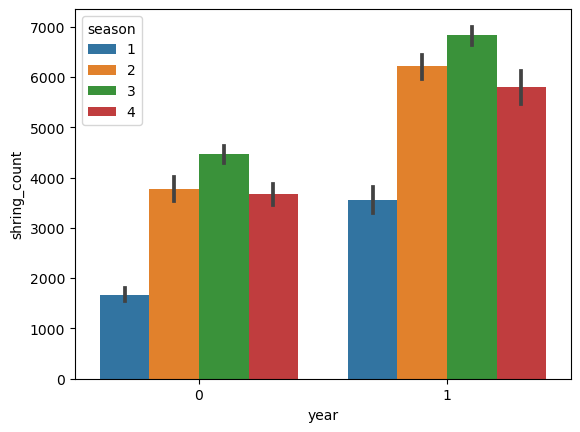

In [87]:
# season wise bike sharing count on Yearly basis. 
# In Jan 2000 bike sharing count is there and Feb ~3.5K, March ~3.5K, April 4.5K etc
# season 3 has seen highest bike sharing count (6th month - 9th month)
# Less bike sharing in first season 
# Hence season, month, Year are the critical parameters 
# The bike sharing volume has been increased in the year of 2019 when compared to 2018.
sns.barplot(x='year', y='shring_count', hue='season', data=bs)
plt.show()

<Axes: xlabel='holiday', ylabel='shring_count'>

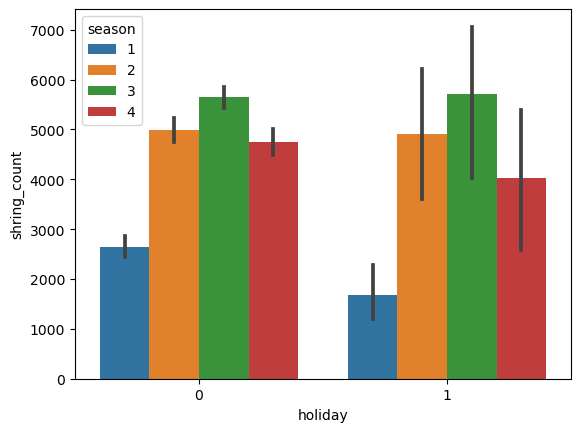

In [88]:
# season wise bike sharing count on holidays. 
# season 3 has seen highest bike sharing count (6th month - 9th month)
# Less bike sharing in first season 
# Hence season, month are the critical parameters 

sns.barplot(x='holiday', y='shring_count', data=bs, hue='season')

# Finding : holiday is 1, not holiday is 0
# The bike sharing is more in "Not Holidays"


<Axes: xlabel='season', ylabel='shring_count'>

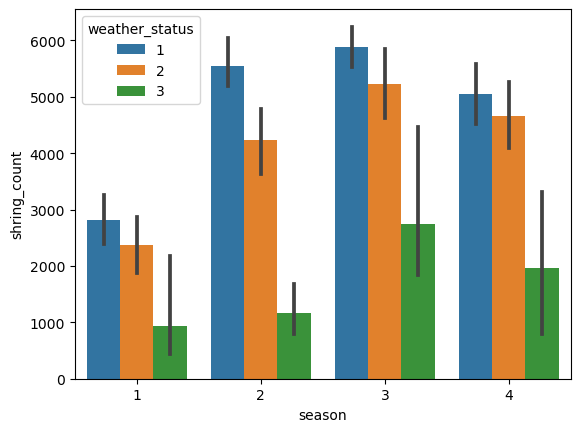

In [89]:
# The bike sharing is more when there is clear environment, few clouds and no rain.
# Weather condition is also a critical parameter.
sns.barplot(x='season', y='shring_count', data=bs, ci=100, hue='weather_status')

# Find Outlier

<Axes: >

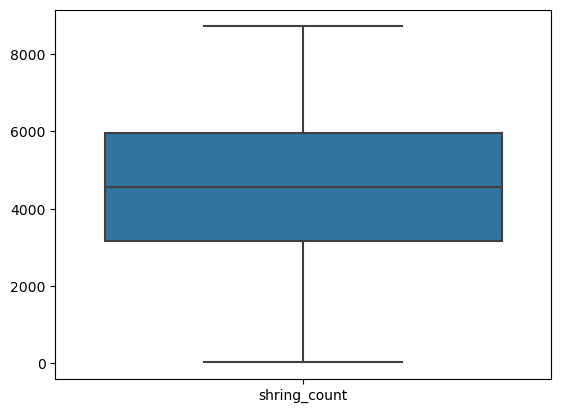

In [91]:
# Surprisingly No Outliers
sns.boxplot(data=bs[['shring_count']])

<Axes: >

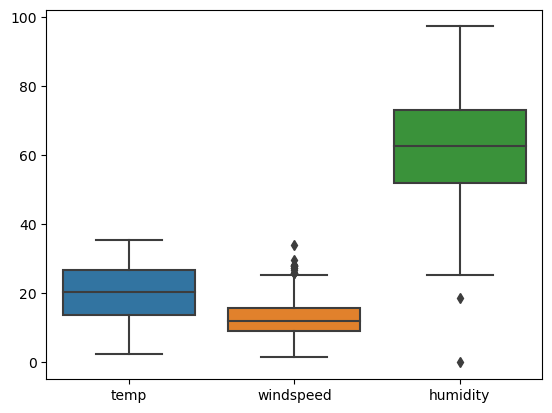

In [92]:
# Found two pointers which indicate the outliers in 'humid' climate
# Found two pointers which indicate the outliers in 'windspeed' climate
sns.boxplot(data=bs[['temp','windspeed','humidity']])

In [93]:
#create dataframe for outliers
humidityOfWind=pd.DataFrame(bs,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']       
                      
for i in cnames:
    q75,q25=np.percentile(humidityOfWind.loc[:,i],[75,25]) # Divide it by 75% quantile and 25% quantile.
    iqr=q75-q25 #range of Inter quantile 
    max=q75+(iqr*1.5) 
    min=q25-(iqr*1.5) 
    humidityOfWind.loc[humidityOfWind.loc[:,i]<min,:i]=np.nan  # put it as NA
    humidityOfWind.loc[humidityOfWind.loc[:,i]>max,:i]=np.nan  # put it as NA
# addition of outlier by mean
humidityOfWind['humidity']=humidityOfWind['humidity'].fillna(humidityOfWind['humidity'].mean())
humidityOfWind['windspeed']=humidityOfWind['windspeed'].fillna(humidityOfWind['windspeed'].mean())

In [94]:
# adding humidity column values
bs['humidity']=bs['humidity'].replace(humidityOfWind['humidity'])
#Replacing the imputated windspeed
bs['windspeed']=bs['windspeed'].replace(humidityOfWind['windspeed'])
bs.head(5)

,record_index,datetime,season,year,month,holiday,weekday,workingday,weather_status,temp,feeling_temp,humidity,windspeed,casual,registered,shring_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [106]:
# train and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bs.iloc[:,0:-3],bs.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(511, 14)

(219, 14)

(511, 2)

(219, 2)

,index,shring_count
0,683,5445
1,645,5478
2,163,5020
3,360,1162
4,640,7572


,index,shring_count
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338


In [107]:
#Categorical and numerical features 
# Train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_status','humidity','temp','windspeed']]
# test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_status']]
# categorical attributes
cat_attributes=['season','holiday','workingday','weather_status','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [108]:
# Encode the categorical features to numeric which takes value 1 or 0

train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_status_1,weather_status_2,weather_status_3,year_0,year_1
0,11,4,62.0417,13.188347,10.250129,0,0,0,1,1,0,0,1,0,1,0,0,1
1,10,1,70.9583,15.716653,12.708493,0,0,0,1,0,1,1,0,0,1,0,0,1
2,6,1,49.4583,26.035000,20.458450,0,1,0,0,1,0,0,1,1,0,0,1,0
3,12,2,76.2500,13.325000,12.626150,1,0,0,0,1,0,0,1,0,1,0,1,0
4,10,3,79.3750,26.957500,4.458569,0,0,0,1,1,0,0,1,0,1,0,0,1


In [109]:
#Training datast

X_train=train_encoded_attributes
y_train=y_train.shring_count.values

In [110]:
# fit the model
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

lr_model=linear_model.LinearRegression()
lr_model
lr_model.fit(X_train,y_train)
lr_model

LinearRegression()

In [111]:
#Accuracy of the model
lr=lr_model.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',lr_model.coef_)
print('Model intercept value :',lr_model.intercept_)

Accuracy of the model : 0.8235146581358161
Model coefficients : [  -34.97049205    60.43458209    -8.71287554   121.73963622
   -37.09175176 -1067.52997878   220.84667408    11.86386013
   834.81944457   241.59235767  -241.59235767   -74.74603934
    74.74603934   802.85526546   297.38891277 -1100.24417823
  -991.82798863   991.82798863]
Model intercept value : 2232.8811280208624


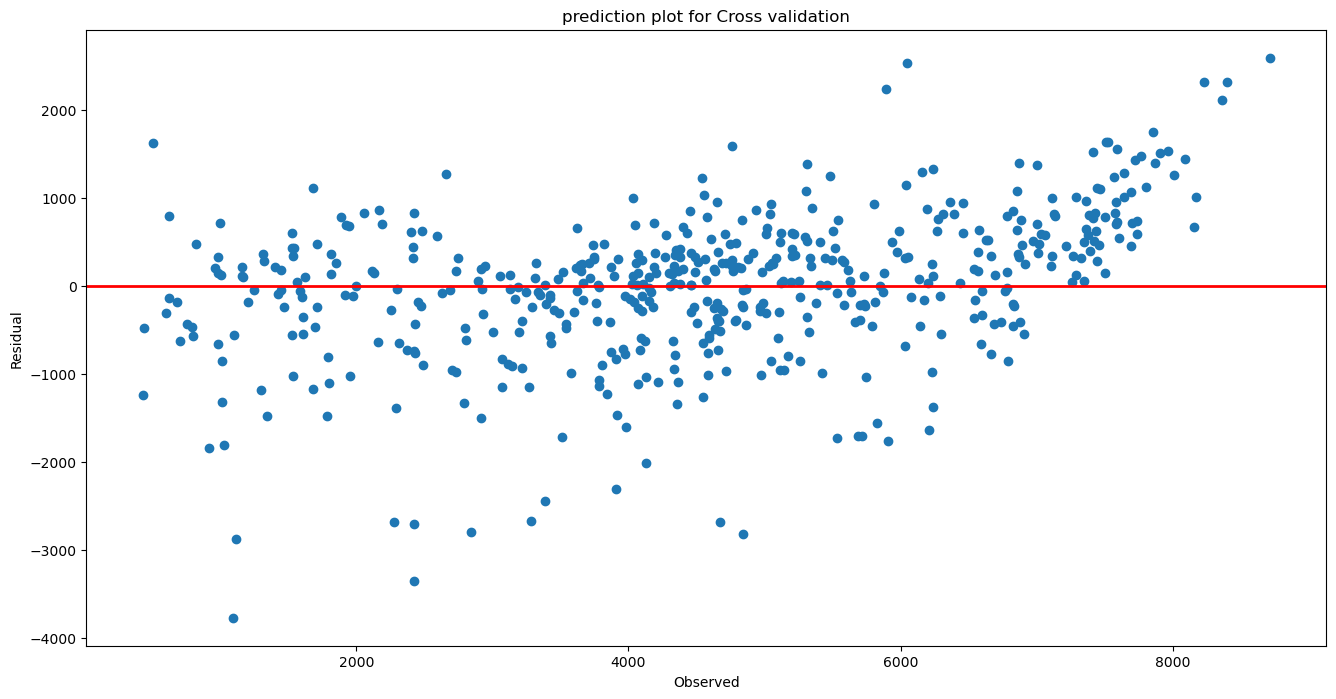

In [117]:
# prediction
prediction=cross_val_predict(lr_model,X_train,y_train,cv=3)
#Cross validation plot
fig,ax=plt.subplots(figsize=(16,8))
ax.set_title('prediction plot for Cross validation')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='red')

plt.show()
# plot states that th finite variance between actual target value and predicted target value
#some data points have same finite variance between them, and some are not having it.

In [118]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (219, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_status_1,weather_status_2,weather_status_3,year_0,year_1
0,4,6,50.2917,20.295000,12.791439,0,1,0,0,1,0,1,0,1,0,0,0,1
1,5,0,81.8750,27.367500,14.333846,0,1,0,0,1,0,1,0,1,0,0,1,0
2,10,0,62.3750,13.085847,11.833339,0,0,0,1,1,0,1,0,1,0,0,1,0
3,12,4,75.7500,17.356653,3.167425,1,0,0,0,1,0,0,1,0,1,0,1,0
4,5,4,49.2917,27.880000,13.083693,0,1,0,0,1,0,0,1,1,0,0,0,1


In [119]:
# prediction on test dataset
X_test=test_encoded_attributes
y_test=y_test.shring_count.values

In [120]:
#predict the model
y_pred=lr_model.predict(X_test)
display(y_pred)

array([6196.04661286, 4343.42428846, 3306.55061595, 1944.84985206,
       7110.96683875, 4669.77352708, 2098.22996151, 2570.11892772,
       3574.40348857, 3717.4014786 , 3014.66899407, 5045.86762577,
       1768.93908372, 3953.24671072, 5220.27615663, 3065.42472795,
       5776.45313988, 1325.95033476, 6088.43218144, 4294.11754971,
       3518.06685534, 4063.52153021, 4509.91665186, 5761.01268669,
       5233.52337804, 5208.93764229, 3727.80142777,  670.96798767,
       4939.9021794 , 1842.30786884, 3490.91253839, 3121.85019543,
       1204.59548476, 1226.01002727, 5425.0809158 , 5227.27610161,
       3221.1766013 , 3237.61334338,  815.60086314, 6746.23076099,
       1759.20738765, 5799.82964097, 5027.71078114, 6260.88717647,
       4740.34706134, 3447.80101989, 6296.38204948, 4985.5534277 ,
       4478.33471489, 6718.80789438, 3858.79799517, 4456.01833916,
       5853.88874918, 5474.62296493, 5491.10141876, 6916.25728827,
       3684.66222042, 6280.56707085, 4222.51238553, 5306.33393

In [123]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,y_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 802.4291866599553
Mean absolute error : 595.244139128348


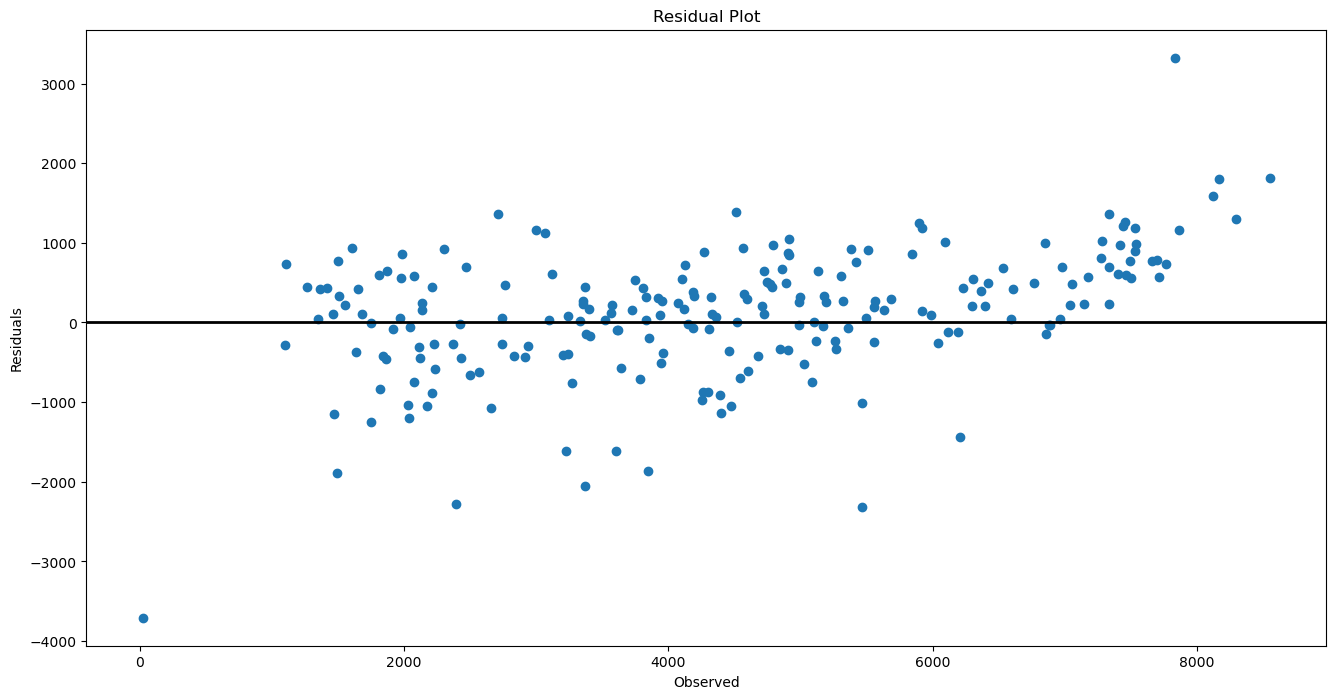

In [125]:
#Residual plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
ax.scatter(y_test, y_test-y_pred)
ax.axhline(lw=2,color='black')

plt.show()

#Residual plot tells about finite variance between actual value and predicted target value. 
# Here,very less data points are having the same finite variance between them

In [126]:
#R-squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8264702594448594

<a id='Observations_and_explanations'></a>
# My Observations are explained below:
</hr>

1. Train data set : Test data set======>  ratio is 70:30.

2. The bike rental count distribution is higher in 2019 than in 2018.
3. During no holidays, the bike rental counts is the highest, compared to during holidays for different seasons.
4. There is no significant change in bike demand with working days and non working days.
5. During clear, partly cloudy weather, the bike rental count is the highest, second-highest during misty cloudy weather, and followed by 3rd highest, during light snow and light rain weather.
6. Outlier analysis:<br>
    (i) No outliers are present in total_count variable.<br>
    (ii) No outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variables.
7. Spring season has seen highest number of bike sharings and Summer also followes the Spring. Fall and winter seasons have seen less bike sharings.

8. Training dataset:<br>
    (i) While fitting Linear regression to our trained dataset, Accuracy of the model: 82.4 %<br>
    (ii) Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In our Cross validation prediction plot for training dataset, some data points are have same finite variance between them and some are not having it.<br>
    (iii) Model Evaluation metrics: R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.The R-squared or coefficient of determination for our model is 0.81 on average , it means that predictor is only able to predict 81% of the variance in the target variable which is contributed by independent variables.<br>
9. Testing dataset:<br>
    (i) Model Evaluation metrics: Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors), and The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.<br>
        For our model, 
        Root mean square error : 802.4291866599553
        Mean absolute error : 595.2441391283483
10. Residual plot tells about finite variance between actual target value and predicted target values. In our Residual plot,very less data points are having the same finite variance between them.